# Introduction

-  Naive Bayes Classifier: probabilistic classifier based on the Bayes' theorem
-  Why 'Naive'?: Assuming independence between features (X variables)

-  Reference
    - NBC: statistical approach
    - logistic: functional approach
    - Support vector machines: geometric approach

- Bayes Theorem

\begin{align}
  P(H~|~D) &= \frac{P(H) P(D~|~H)}{P(D)} \\
  Posterior &= \frac{Prior \times Likelihood}{evidence}
\end{align}

-  Likelihood function

\begin{equation}
  P(D=d~|~H=h) = \frac{1}{\sqrt{2\pi\sigma^2_d}} e^{\frac{(v-\mu_d)^2}{2\sigma^2_d}}
\end{equation}


# Example: Wikipedia

In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [34]:
testing ={'height(feet)':6.0, 'weight(lbs)':130, 'foot_size(inches)':8}
# Q: Male or Female??

In [66]:
wiki = pd.read_csv("c:/python/data/wikiExampleNB.csv", index_col=[0])
wiki.columns =["Person", "height(feet)", "weight(lbs)", "foot_size(inches)"]

training = wiki
training

,Person,height(feet),weight(lbs),foot_size(inches)
num,,,,
1,male,6.00,180,12
2,male,5.92,190,11
3,male,5.58,170,12
4,male,5.92,165,10
5,female,5.00,100,6
6,female,5.50,150,8
7,female,5.42,130,7
8,female,5.75,150,9


In [67]:
training.describe().round(2)

,height(feet),weight(lbs),foot_size(inches)
count,8.00,8.00,8.00
mean,5.64,154.38,9.38
std,0.33,28.96,2.26
min,5.00,100.00,6.00
25%,5.48,145.00,7.75
50%,5.66,157.50,9.50
75%,5.92,172.50,11.25
max,6.00,190.00,12.00


In [71]:
training[training.Person == 'male'].describe()

,height(feet),weight(lbs),foot_size(inches)
count,4.000000,4.000000,4.000000
mean,5.855000,176.250000,11.250000
std,0.187172,11.086779,0.957427
min,5.580000,165.000000,10.000000
25%,5.835000,168.750000,10.750000
50%,5.920000,175.000000,11.500000
75%,5.940000,182.500000,12.000000
max,6.000000,190.000000,12.000000


In [72]:
training[training.Person == 'female'].describe()

,height(feet),weight(lbs),foot_size(inches)
count,4.000000,4.000000,4.000000
mean,5.417500,132.500000,7.500000
std,0.311809,23.629078,1.290994
min,5.000000,100.000000,6.000000
25%,5.315000,122.500000,6.750000
50%,5.460000,140.000000,7.500000
75%,5.562500,150.000000,8.250000
max,5.750000,150.000000,9.000000


\begin{align}
  Posterior_{male} &= \frac{P(height~|~male)\cdot P(weight~|~male)\cdot P(footsize~|~male)}{evidence} \\
  Posterior_{female} &= \frac{P(height~|~female)\cdot P(weight~|~female)\cdot P(footsize~|~female)}{evidence} \\
\end{align}

With above male/female table you can calculate 

\begin{equation}
  P(height|male) = \frac{1}{\sqrt{2\pi\sigma^2_{height|male}}} e^{\frac{(v-\mu_{height|male})^2}{2\sigma^2_{height|male}}} \\
\end{equation}

 where $\mu_{height|male}$=5.85, $\sigma_{height|male}$=0.187

\begin{align}
posterior(male) & \approx P(height~|~male)\cdot P(weight~|~male)\cdot P(footsize~|~male) =  6.2 \times 10^-9\\
posterior(female) & \approx P(height~|~female)\cdot P(weight~|~female)\cdot P(footsize~|~female) = 5.4 \times 10^-4
\end{align}

# Example: with random number generation

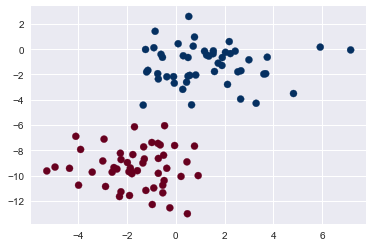

In [7]:
from sklearn.datasets import make_blobs
import seaborn as sns; sns.set()

X, y = make_blobs(100, 2, centers=2, cluster_std=1.5, random_state=2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

## training set analysis

[(-15, 5), (-8, 8)]

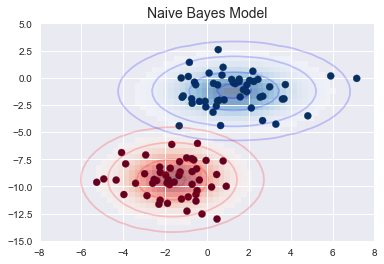

In [9]:
fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)  # where is covariance?
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)

## Find Posterior using sklearn

In [ ]:
# New Dataset

rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)

#$Find probability of random samples' random state?'$

In [10]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [11]:
ynew = model.predict(Xnew)

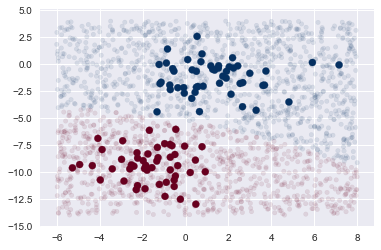

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
# lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
# plt.axis(lim);

In [87]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)  # posterior probability of each label

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

# Multinomial Naive Bayes: With Text Example

In [1]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [2]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [90]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [91]:
print(train.data[33])

From: hathaway@stsci.edu
Subject: Re: Vandalizing the sky.
Distribution: na
Organization: Space Telescope Science Institute
Lines: 101

>Newsgroups: sci.astro,sci.space
>Subject: Re: Vandalizing the sky.
>
 (excerpts from posting on this topic) 

>In article <C5t05K.DB6@research.canon.oz.au> enzo@research.canon.oz.au 
>(Enzo Liguori) writes:
>
>>Now, Space Marketing
>>is working with University of Colorado and Livermore engineers on
>>a plan to place a mile-long inflatable billboard in low-earth
>>orbit.  
>... 
>>... the real purpose of the project is to help the environment! 
>>The platform will carry ozone monitors 
>
>... 
>I can't believe that a mile-long billboard would have any significant
>effect on the overall sky brightness.  Venus is visible during the day,
>but nobody complains about that.  Besides, it's in LEO, so it would only
>be visible during twilight when the sky is already bright, and even if
>it would have some miniscule impact, it would be only for a short time
>as

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [4]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

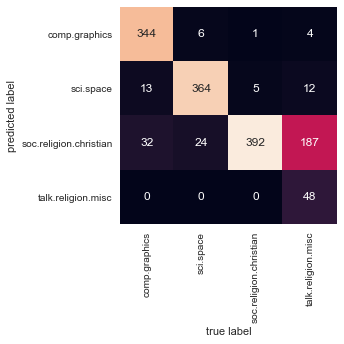

In [8]:
# performance of the estimator

from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

## prediction using the above model

In [95]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [96]:
predict_category('determining the screen resolution')

'comp.graphics'

In [97]:
predict_category('grading in economics exam')

'soc.religion.christian'

In [98]:
predict_category('sogang university')

'comp.graphics'

In [10]:
vectorizer = TfidfVectorizer()

vectorised_train_documents = vectorizer.fit_transform(train.data)
vectorised_test_documents = vectorizer.transform(test.data)


In [11]:
mlb = MultiLabelBinarizer()

train_labels = mlb.fit_transform(train.target)
test_labels = mlb.transform(test.data)


NameError: name 'MultiLabelBinarizer' is not defined

In [ ]:
# from https://github.com/saopayne/ml-projects/commit/ab7c2a3a4b8691ed33856659c4a2f884171a7363

def represent(documents):

    train_docs_id = list(filter(lambda doc: doc.startswith("train"), documents))
    test_docs_id = list(filter(lambda doc: doc.startswith("test"), documents))

    train_docs = [reuters.raw(doc_id) for doc_id in train_docs_id]
    test_docs = [reuters.raw(doc_id) for doc_id in test_docs_id]

    # Tokenization
    vectorizer = TfidfVectorizer(tokenizer=tokenize)

    # Learn and transform train documents
    vectorised_train_documents = vectorizer.fit_transform(train_docs)
    vectorised_test_documents = vectorizer.transform(test_docs)

    # Transform multilabel labels
    mlb = MultiLabelBinarizer()
    train_labels = mlb.fit_transform([reuters.categories(doc_id) for doc_id in train_docs_id])
    test_labels = mlb.transform([reuters.categories(doc_id) for doc_id in test_docs_id])

    return vectorised_train_documents, train_labels, vectorised_test_documents, test_labels 

In [15]:
contents = train.data

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(contents)
feature_names = vectorizer.get_feature_names()
dense = tfidf_matrix.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names) #, index=characters)
#s = pd.Series(df.loc['Adam'])
#s[s > 0].sort_values(ascending=False)[:10]

In [16]:
df[:10]

,00,000,0000,00000,000000,000005102000,000021,000062david42,0000vec,0001,...,zwakke,zware,zwart,zwarte,zxmkr08,zyeh,zyxel,ªl,º_________________________________________________º_____________________º,ºnd
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
